In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model


In [2]:

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)




In [3]:

FLOWERS_DIR = './flower_photos'
FLOWERS_DIR = pathlib.Path(FLOWERS_DIR)
print(os.path.abspath(FLOWERS_DIR))
data_dir = FLOWERS_DIR
print(os.path.abspath(data_dir))

C:\Users\multicampus\Documents\PyJu\after\flower_photos
C:\Users\multicampus\Documents\PyJu\after\flower_photos


In [4]:
image_count = len(list(FLOWERS_DIR.glob('*/*.jpg')))
print(image_count)

9534


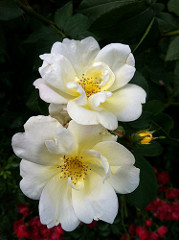

In [5]:
roses = list(data_dir.glob('장미/*'))
PIL.Image.open(str(roses[0]))

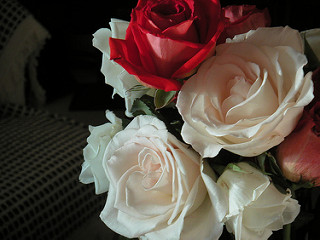

In [6]:
PIL.Image.open(str(roses[1]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9534 files belonging to 14 classes.
Using 7628 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9534 files belonging to 14 classes.
Using 1906 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['강아지풀', '개나리', '국화', '나팔꽃', '데이지', '무궁화', '민들레', '벚꽃', '장미', '초롱꽃', '코스모스', '토끼풀', '튤립', '해바라기']


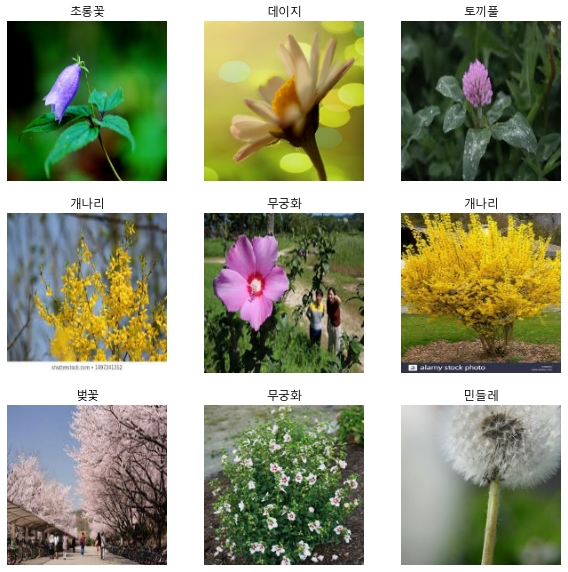

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image)) 

###############
num_classes = 14
###############
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

0.0 1.0


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
239/239 [==============================] - 130s 545ms/step - loss: 1.9551 - accuracy: 0.3616 - val_loss: 1.5499 - val_accuracy: 0.5021
Epoch 2/10
239/239 [==============================] - 132s 554ms/step - loss: 1.3754 - accuracy: 0.5570 - val_loss: 1.3576 - val_accuracy: 0.5446
Epoch 3/10
239/239 [==============================] - 130s 542ms/step - loss: 1.0032 - accuracy: 0.6744 - val_loss: 1.2143 - val_accuracy: 0.6076
Epoch 4/10
239/239 [==============================] - 132s 553ms/step - loss: 0.6303 - accuracy: 0.7969 - val_loss: 1.2846 - val_accuracy: 0.6118
Epoch 5/10
239/239 [==============================] - 129s 539ms/step - loss: 0.3503 - accuracy: 0.8917 - val_loss: 1.4800 - val_accuracy: 0.6128
Epoch 6/10
239/239 [==============================] - 129s 538ms/step - loss: 0.1782 - accuracy: 0.9461 - val_loss: 1.7649 - val_accuracy: 0.6186
Epoch 7/10
239/239 [==============================] - 129s 540ms/step - loss: 0.1139 - accuracy: 0.9655 - val_loss: 2.0720 -

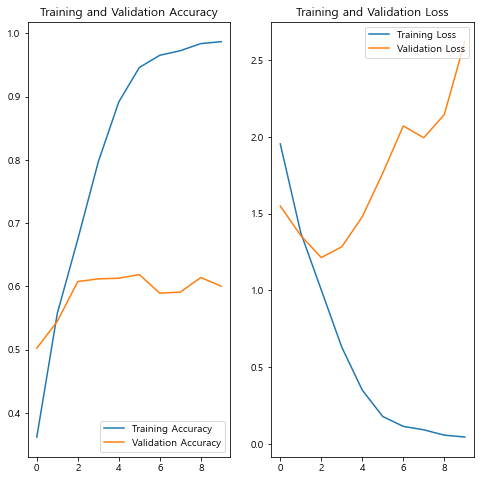

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('mnist_mlp_model1_201002_14.h5')

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

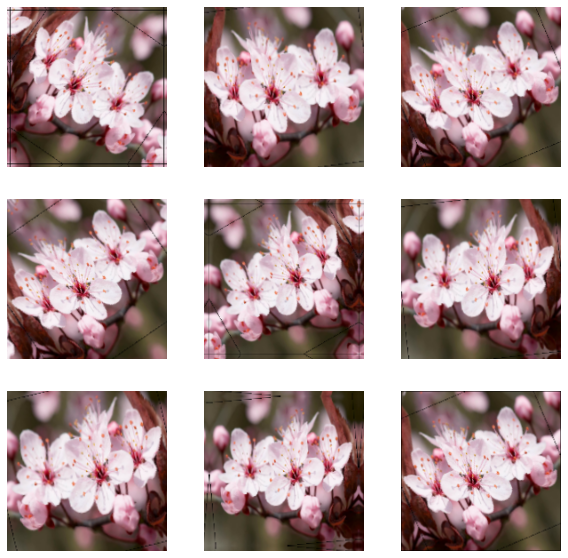

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    


In [28]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [30]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [31]:
epochs = 16
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/16
239/239 [==============================] - 90s 377ms/step - loss: 1.9459 - accuracy: 0.3579 - val_loss: 1.6491 - val_accuracy: 0.4544
Epoch 2/16
239/239 [==============================] - 91s 383ms/step - loss: 1.5449 - accuracy: 0.4899 - val_loss: 1.4795 - val_accuracy: 0.5147
Epoch 3/16
239/239 [==============================] - 92s 387ms/step - loss: 1.3873 - accuracy: 0.5405 - val_loss: 1.3566 - val_accuracy: 0.5567
Epoch 4/16
239/239 [==============================] - 90s 379ms/step - loss: 1.2579 - accuracy: 0.5857 - val_loss: 1.3262 - val_accuracy: 0.5645
Epoch 5/16
239/239 [==============================] - 94s 391ms/step - loss: 1.1570 - accuracy: 0.6185 - val_loss: 1.1875 - val_accuracy: 0.6002
Epoch 6/16
239/239 [==============================] - 93s 388ms/step - loss: 1.0801 - accuracy: 0.6446 - val_loss: 1.2415 - val_accuracy: 0.6007
Epoch 7/16
239/239 [==============================] - 98s 408ms/step - loss: 1.0084 - accuracy: 0.6689 - val_loss: 1.1902 - val_ac

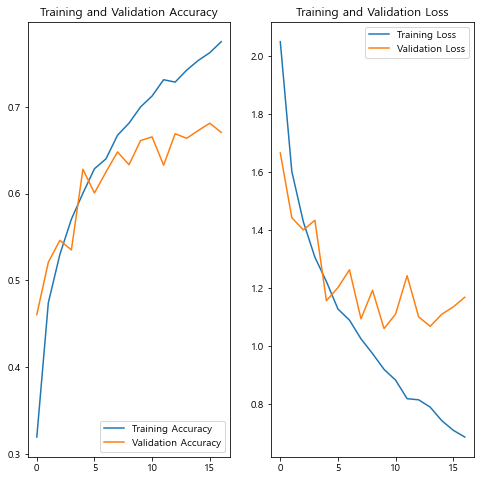

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
test_image_path = './test_imgs/test4.jpg'

img = keras.preprocessing.image.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to 장미 with a 50.40 percent confidence.


In [25]:
model.save('mnist_mlp_model3_201002_14.h5')